# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Oct 1, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: __Haozhe Wang__

Student ID: 

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).


 <font color='red'>**Remember to push your work on GitHub and share the link of your private repo on Quercus.**</font> 




# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target']=dataset.target
df

print('Mean Area>700:',len(df[df['mean area']>700]))
print('Malignant:',len(df[df['target']==0]))
print('Benign:',len(df[df['target']==1]))

df.describe()


Mean Area>700: 171
Malignant: 212
Benign: 357


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? __30__
* How many observations have a 'mean area' of greater than 700? __171__
* How many participants tested `Malignant`? __212__
* How many participants tested `Benign`? __357__

**Answer:**

**(1) 30**

**(2) 171**

**(3) 212**

**(4) 357**

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [ ]:
### YOUR CODE HERE ###
feature_data = dataset.data
target_data = dataset.target
feature_name = dataset.feature_names

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)

X_train_df_tg = pd.DataFrame(data=X_train, columns=feature_name)
X_train_df_tg['target']=y_train
X_train_df = pd.DataFrame(data=X_train, columns=feature_name)

X_test_df_tg = pd.DataFrame(data=X_test, columns=feature_name)
X_test_df_tg['target']=y_test
X_test_df = pd.DataFrame(data=X_test, columns=feature_name)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**





**Answer:**

**It could be observed that the data of worst smoothness (x-axis) and worst fractal dimension (y-axis) in the first plots below have different values, means and ranges, which would cause the feature of lager range have higher dominance during learning process. After standardization, the data in second plots now have the same means and ranges.**

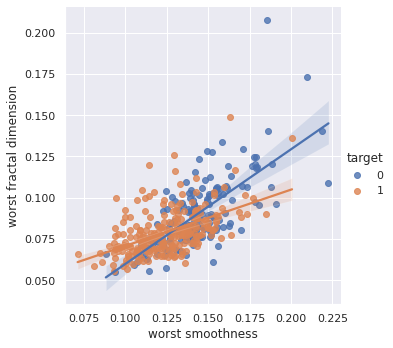

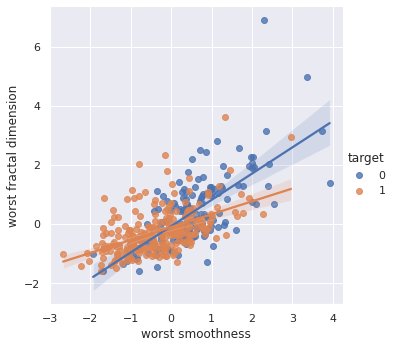

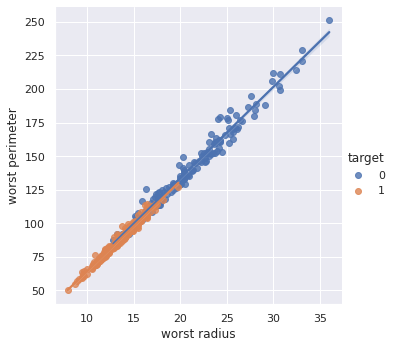

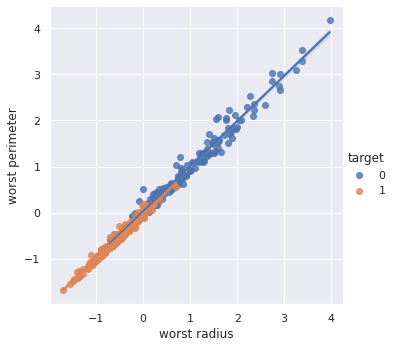

In [ ]:
### YOUR CODE HERE ###
import seaborn as sns; sns.set_theme(color_codes=True)

plot1 = sns.lmplot(x="worst smoothness", y="worst fractal dimension", hue="target", data=X_train_df_tg)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
X_train_scale = pd.DataFrame(data=(scaler.transform(X_train)), columns=dataset.feature_names)
X_train_scale['target'] = y_train

plot2 = sns.lmplot(x="worst smoothness", y="worst fractal dimension", hue="target", data=X_train_scale)

plot3 = sns.lmplot(x="worst radius", y="worst perimeter", hue="target", data=X_train_df_tg)

plot4 = sns.lmplot(x="worst radius", y="worst perimeter", hue="target", data=X_train_scale)

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]** 




**Answer:**

2. The best k is 10, and the highest cross-validation accuracy is 93.465%.
3. Underfitted k range is [17,100], and Overfitted k range is [1,9].

k= 1   MeanTrainAccuracy: 1.0  MeanValidationAccuracy: 0.9171202531645569
k= 2   MeanTrainAccuracy: 0.9629403994400743  MeanValidationAccuracy: 0.9170886075949367
k= 3   MeanTrainAccuracy: 0.9503795272175232  MeanValidationAccuracy: 0.9272151898734178
k= 4   MeanTrainAccuracy: 0.943467202933696  MeanValidationAccuracy: 0.927120253164557
k= 5   MeanTrainAccuracy: 0.9371857810374401  MeanValidationAccuracy: 0.919620253164557
k= 6   MeanTrainAccuracy: 0.9378107687151278  MeanValidationAccuracy: 0.9246518987341773
k= 7   MeanTrainAccuracy: 0.9365548786498689  MeanValidationAccuracy: 0.9321518987341773
k= 8   MeanTrainAccuracy: 0.9365548786498689  MeanValidationAccuracy: 0.9321518987341773
k= 9   MeanTrainAccuracy: 0.9315293468188719  MeanValidationAccuracy: 0.9246202531645569
k= 10   MeanTrainAccuracy: 0.9340391553794287  MeanValidationAccuracy: 0.9346518987341772
k= 11   MeanTrainAccuracy: 0.9302675420437294  MeanValidationAccuracy: 0.9346518987341772
k= 12   MeanTrainAccuracy: 0.93152540

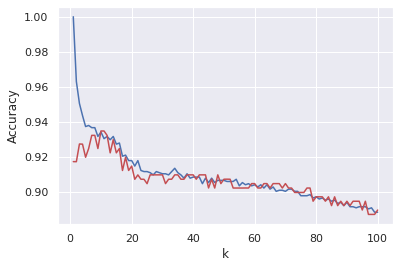

In [ ]:
### YOUR CODE HERE ###
from sklearn import neighbors
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

scores_train = np.zeros(100)
scores_test = np.zeros(100)
axis = range(1,101)

for k in range (1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors = k )
  scores = cross_validate(knn, X_train_df, y_train, cv=5, return_train_score=True)
  scores_train[k-1] = scores['train_score'].mean()
  scores_test[k-1] = scores['test_score'].mean()
  print('k=',k,'  MeanTrainAccuracy:',scores_train[k-1],' MeanValidationAccuracy:',scores_test[k-1])

plt.plot(axis, scores_train, 'b', label='TrainAccuracy')
plt.plot(axis, scores_test, 'r', label='TestAccuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to remove another feature. To do that we fit a new decision tree to the remaining features and identify the least important feature. 


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[3]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 1, fit a new tree on the reduced dataset and follow all the steps until you meet the stop condition. 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


Loading...
Full k: 10 
Full Feature Cross Validate: 0.9346518987341772
----------------------------------------


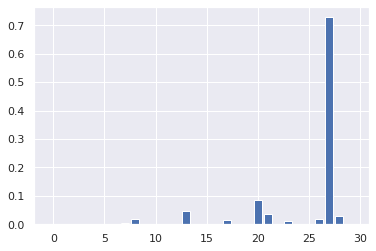

----------------------------------------
Removed Features: ['mean radius']
Best k: 10 
Best Cross Validate: 0.9346518987341772 



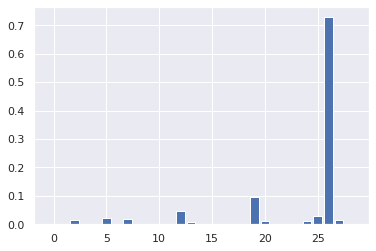

----------------------------------------
Removed Features: ['mean radius', 'mean texture']
Best k: 10 
Best Cross Validate: 0.9346518987341772 



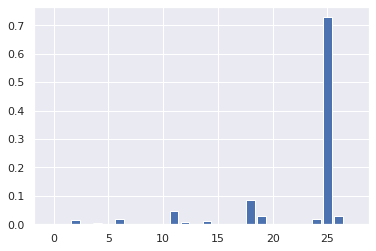

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter']
Best k: 7 
Best Cross Validate: 0.9321518987341773 



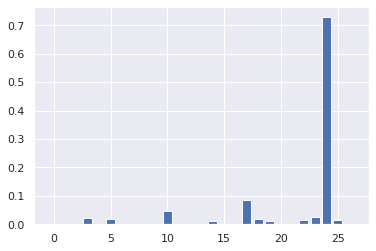

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



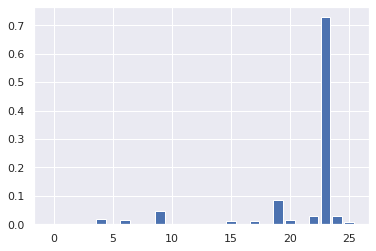

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



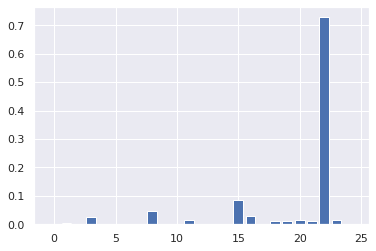

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



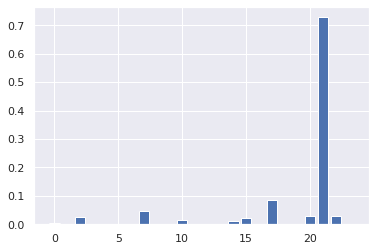

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



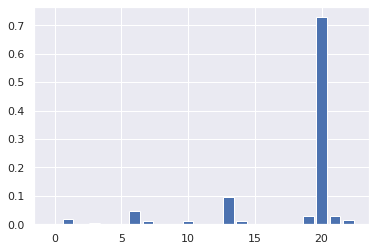

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



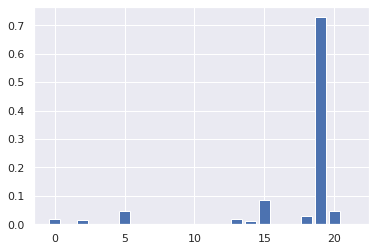

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



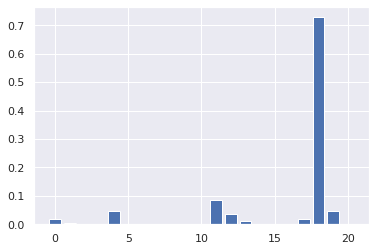

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



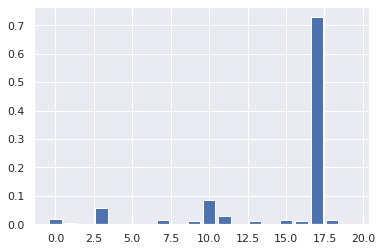

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



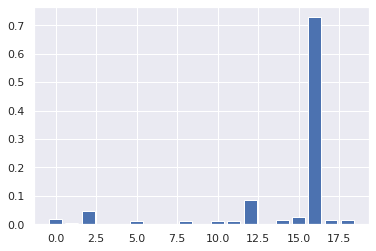

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



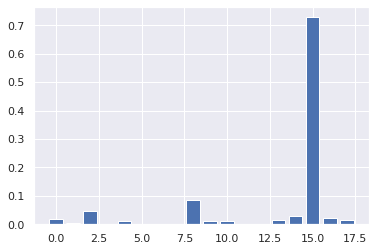

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



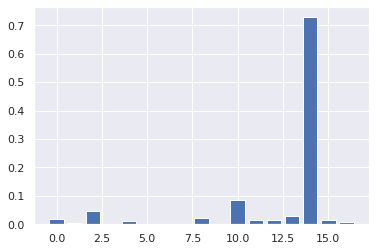

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



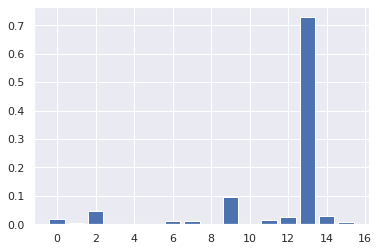

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



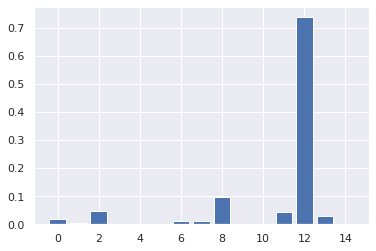

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



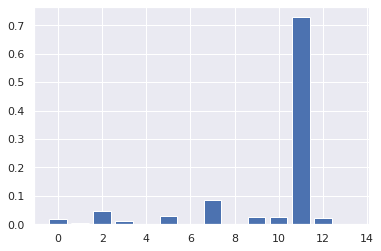

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



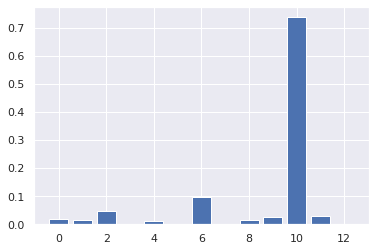

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter']
Best k: 61 
Best Cross Validate: 0.9145569620253164 



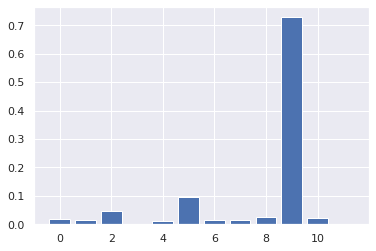

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst fractal dimension']
Best k: 61 
Best Cross Validate: 0.9145569620253164 



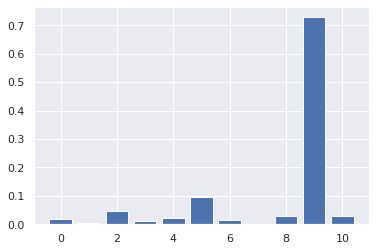

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst fractal dimension', 'worst compactness']
Best k: 61 
Best Cross Validate: 0.9145569620253164 



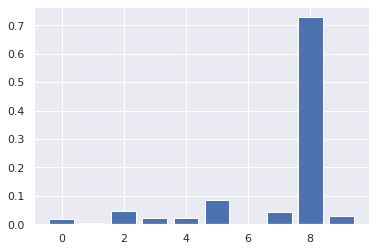

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst fractal dimension', 'worst compactness', 'worst smoothness']
Best k: 61 
Best Cross Validate: 0.9145569620253164 



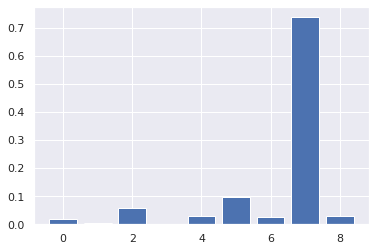

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst fractal dimension', 'worst compactness', 'worst smoothness', 'fractal dimension error']
Best k: 61 
Best Cross Validate: 0.9145569620253164 



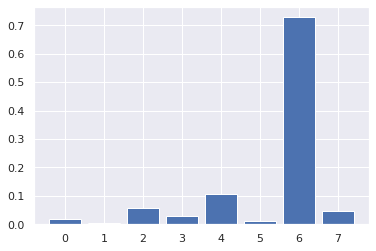

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst fractal dimension', 'worst compactness', 'worst smoothness', 'fractal dimension error', 'radius error']
Best k: 61 
Best Cross Validate: 0.9145569620253164 



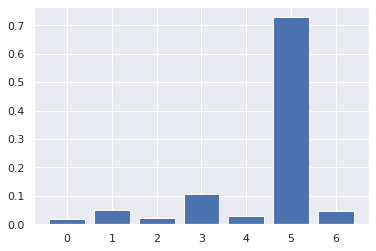

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst fractal dimension', 'worst compactness', 'worst smoothness', 'fractal dimension error', 'radius error', 'mean symmetry']
Best k: 61 
Best Cross Validate: 0.9145569620253164 



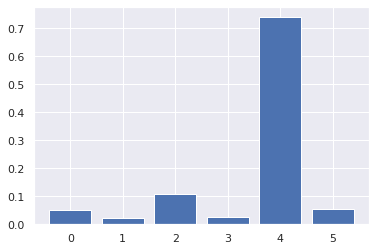

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst fractal dimension', 'worst compactness', 'worst smoothness', 'fractal dimension error', 'radius error', 'mean symmetry', 'worst texture']
Best k: 64 
Best Cross Validate: 0.9145569620253164 



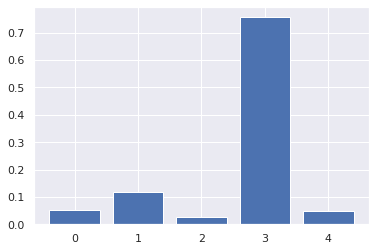

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst fractal dimension', 'worst compactness', 'worst smoothness', 'fractal dimension error', 'radius error', 'mean symmetry', 'worst texture', 'worst concavity']
Best k: 64 
Best Cross Validate: 0.9145569620253164 



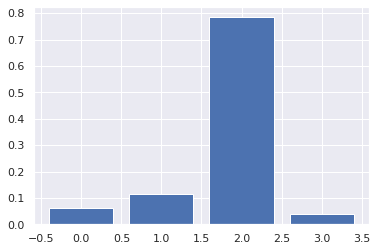

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst fractal dimension', 'worst compactness', 'worst smoothness', 'fractal dimension error', 'radius error', 'mean symmetry', 'worst texture', 'worst concavity', 'worst symmetry']
Best k: 64 
Best Cross Validate: 0.9145569620253164 



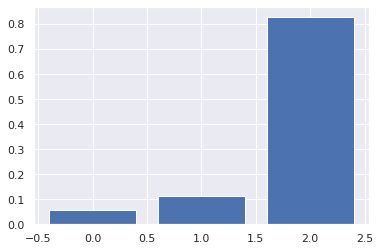

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst fractal dimension', 'worst compactness', 'worst smoothness', 'fractal dimension error', 'radius error', 'mean symmetry', 'worst texture', 'worst concavity', 'worst symmetry', 'area error']
Best k: 34 
Best Cross Validate: 0.9145886075949367 



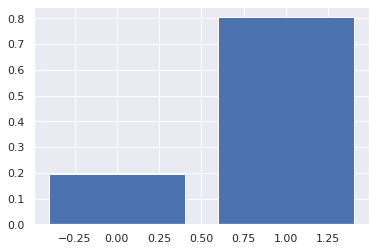

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst fractal dimension', 'worst compactness', 'worst smoothness', 'fractal dimension error', 'radius error', 'mean symmetry', 'worst texture', 'worst concavity', 'worst symmetry', 'area error', 'worst area']
Best k: 34 
Best Cross Validate: 0.9246202531645569 



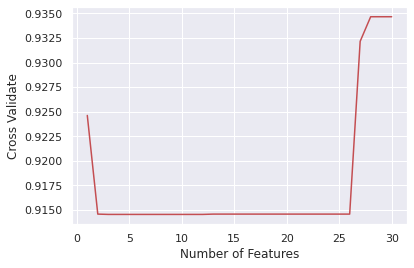

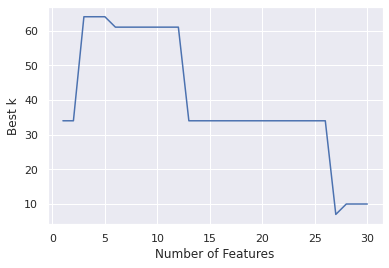

In [ ]:
def Feature_selector (X_train , y_train , tr=0.95):
### YOUR CODE HERE ###
  from sklearn import tree
  from sklearn import feature_selection
  from matplotlib import pyplot

  X_train_fs = X_train
  flag = 1
  best_k_list = []
  best_cross_validate_list = []
  least_importance_index = []
  feature_name = np.array(dataset.feature_names) # record feature name of the dataset

  full_k, full_cross_validate = KNN_find_best_k(X_train, y_train)
  print('Full k:',full_k, '\nFull Feature Cross Validate:',full_cross_validate)

  best_k_list.append(full_k)
  best_cross_validate_list.append(full_cross_validate)

  dt = tree.DecisionTreeClassifier()

  while(flag):

    dt.fit(X_train_fs,y_train)
    importance = dt.feature_importances_  # output importance of different features
    current_feature_length = len(importance)

    importance_df = pd.DataFrame(data=[importance], columns=feature_name)
    importance_np = np.array(importance)  # transform importance to numpy

    pyplot.bar([x for x in range(current_feature_length)], importance)
    pyplot.show()
    print('----------------------------------------')

    removed_importance_index = np.argmin(importance_np) # find the least important feature

    least_importance_index.append(feature_name[removed_importance_index]) # record the least important feature that just found
    X_train_fs.drop(feature_name[removed_importance_index], axis=1, inplace=True) # remove the least important feature from dataset
    feature_name = np.delete(feature_name, removed_importance_index)  # Temove the least important feature name from feature name index

    print('Removed Features:',least_importance_index) # plot the feature name that just removed
    
    best_k, best_cross_validate = KNN_find_best_k(X_train_fs, y_train)  # find best k
    best_k_list.append(best_k)
    best_cross_validate_list.append(best_cross_validate)
    print('Best k:',best_k, '\nBest Cross Validate:',best_cross_validate,'\n')
  
    if((best_cross_validate < tr*full_cross_validate) | (current_feature_length <=2)):
      flag = 0  # keep removing features unless fulfilling the requirement

  return best_k_list, best_cross_validate_list, least_importance_index



def KNN_find_best_k (X_train, y_train):
  best_k = 1
  best_cross_validate = 0

  for k in range (1,101):

    knn = neighbors.KNeighborsClassifier(n_neighbors = k )
    scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
    current_cross_validate = scores['test_score'].mean()

    if current_cross_validate > best_cross_validate:
      best_cross_validate = current_cross_validate
      best_k = k
  
  return best_k, best_cross_validate


### Main Program Here ###

print('Loading...') 

best_k_list, best_cross_validate_list, least_importance_index = Feature_selector (X_train_df, y_train, tr=0.95)

axis = range(1,31)
best_k_list = best_k_list[::-1]  # reverse the array
best_cross_validate_list = best_cross_validate_list[::-1]

plt.plot(axis, best_cross_validate_list, 'r', label='BestCrossValidate')
plt.xlabel('Number of Features')
plt.ylabel('Cross Validate')
plt.show()


plt.plot(axis, best_k_list, 'b', label='BestK')
plt.xlabel('Number of Features')
plt.ylabel('Best k')
plt.show()

### This program might take up to 5 mins to run ###
### Thanks for your patience ###

## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


**Answer:**

**Standardization increases the accuracy of KNN by about 5%, and significantly reduces the best k for KNN.**

**We could see that feature 'worst concave points' plays a dominant role in the dataset (usually over 70% importance). Besides 'worst concave points', we could achieve a more satisfactory accuracy if adding a few more features for KNN. (e.g 6 features)**

**In standardized case, a good k would be considered to be between 6 and 10. A larger k could lead to underfitting, while a smaller k would cause overfitting.**

Loading...
Full k: 10 
Full Feature Cross Validate: 0.9674367088607594


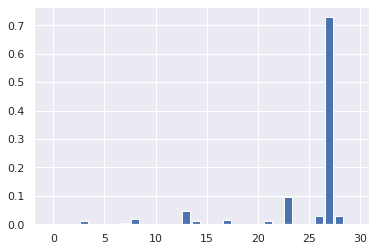

----------------------------------------
Removed Features: ['mean radius']
Best k: 8 
Best Cross Validate: 0.9649683544303798 



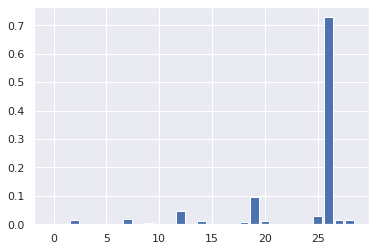

----------------------------------------
Removed Features: ['mean radius', 'mean texture']
Best k: 4 
Best Cross Validate: 0.9623417721518986 



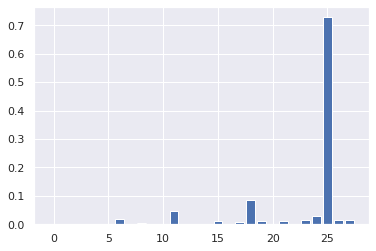

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter']
Best k: 8 
Best Cross Validate: 0.9598417721518986 



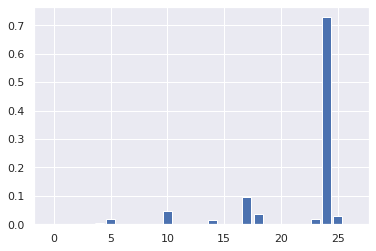

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
Best k: 8 
Best Cross Validate: 0.9598417721518988 



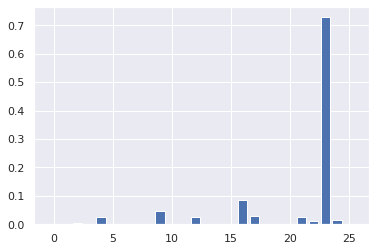

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
Best k: 5 
Best Cross Validate: 0.9572468354430381 



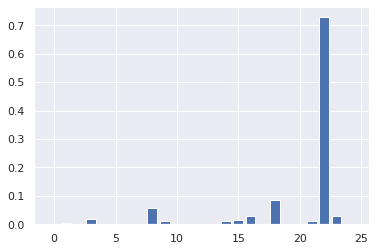

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness']
Best k: 7 
Best Cross Validate: 0.9623417721518986 



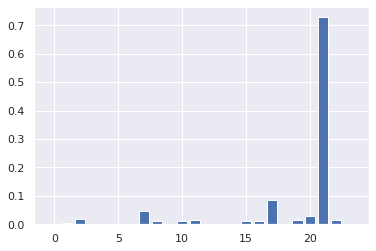

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity']
Best k: 7 
Best Cross Validate: 0.9573101265822783 



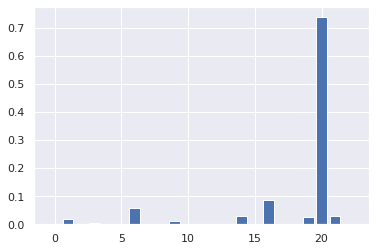

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points']
Best k: 8 
Best Cross Validate: 0.9573101265822785 



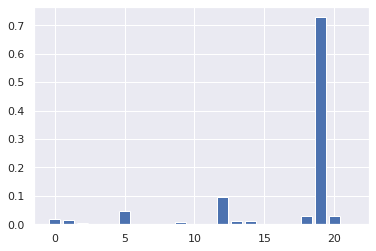

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error']
Best k: 5 
Best Cross Validate: 0.9598417721518986 



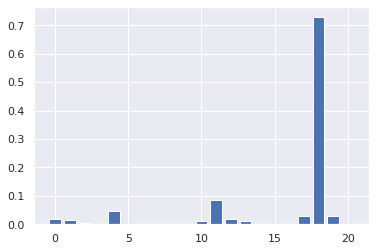

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error']
Best k: 10 
Best Cross Validate: 0.9573101265822785 



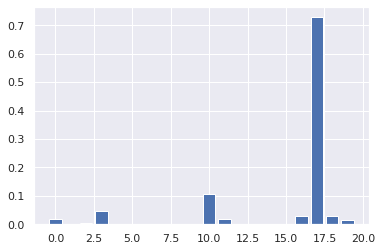

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension']
Best k: 8 
Best Cross Validate: 0.9573417721518986 



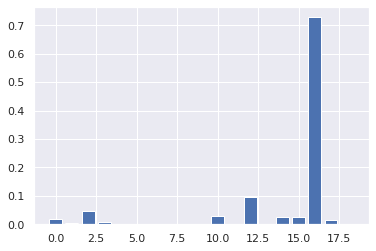

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error']
Best k: 3 
Best Cross Validate: 0.9572784810126581 



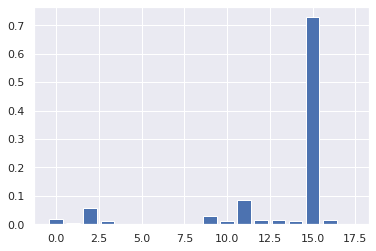

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error']
Best k: 8 
Best Cross Validate: 0.9598101265822784 



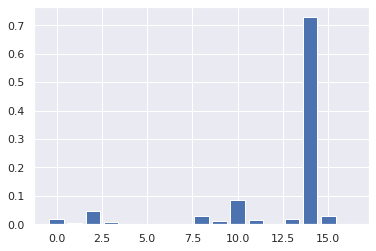

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error']
Best k: 4 
Best Cross Validate: 0.9623101265822784 



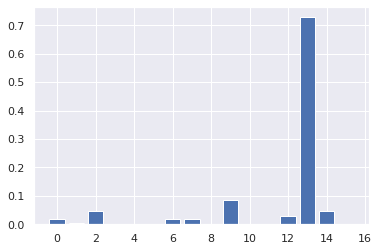

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error']
Best k: 3 
Best Cross Validate: 0.9623417721518986 



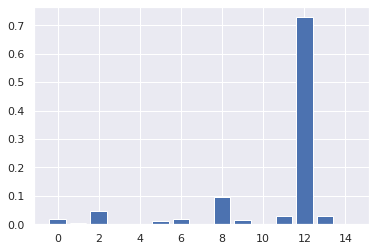

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error']
Best k: 6 
Best Cross Validate: 0.9623417721518986 



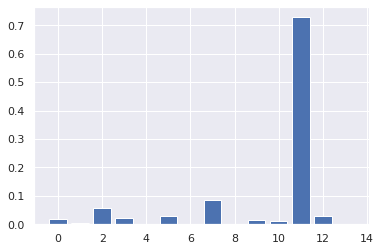

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error', 'worst radius']
Best k: 8 
Best Cross Validate: 0.967373417721519 



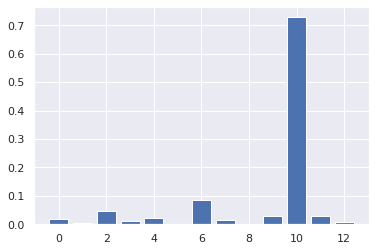

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error', 'worst radius', 'worst perimeter']
Best k: 11 
Best Cross Validate: 0.954778481012658 



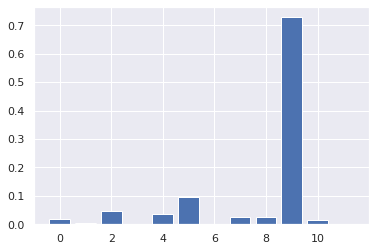

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error', 'worst radius', 'worst perimeter', 'worst smoothness']
Best k: 6 
Best Cross Validate: 0.9598417721518986 



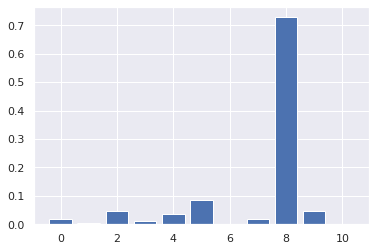

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error', 'worst radius', 'worst perimeter', 'worst smoothness', 'worst compactness']
Best k: 4 
Best Cross Validate: 0.9624050632911392 



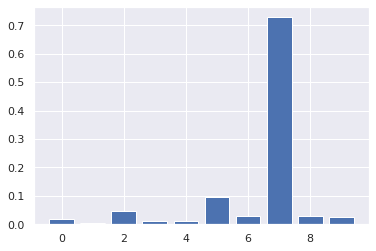

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error', 'worst radius', 'worst perimeter', 'worst smoothness', 'worst compactness', 'radius error']
Best k: 4 
Best Cross Validate: 0.9598734177215189 



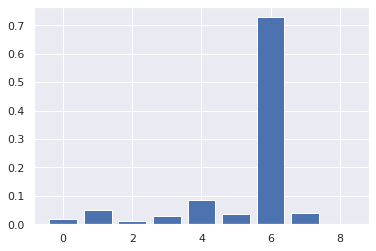

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error', 'worst radius', 'worst perimeter', 'worst smoothness', 'worst compactness', 'radius error', 'worst fractal dimension']
Best k: 24 
Best Cross Validate: 0.9599050632911392 



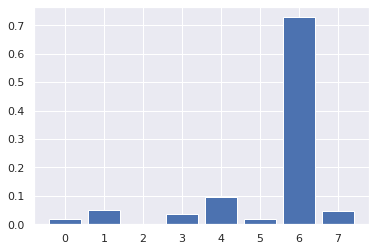

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error', 'worst radius', 'worst perimeter', 'worst smoothness', 'worst compactness', 'radius error', 'worst fractal dimension', 'fractal dimension error']
Best k: 10 
Best Cross Validate: 0.9624050632911393 



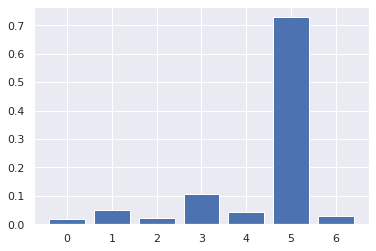

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error', 'worst radius', 'worst perimeter', 'worst smoothness', 'worst compactness', 'radius error', 'worst fractal dimension', 'fractal dimension error', 'mean symmetry']
Best k: 8 
Best Cross Validate: 0.9675 



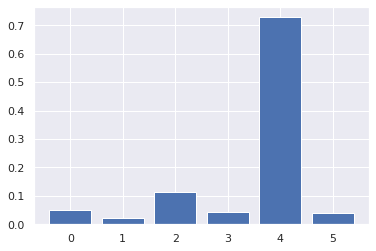

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error', 'worst radius', 'worst perimeter', 'worst smoothness', 'worst compactness', 'radius error', 'worst fractal dimension', 'fractal dimension error', 'mean symmetry', 'worst texture']
Best k: 28 
Best Cross Validate: 0.9573417721518986 



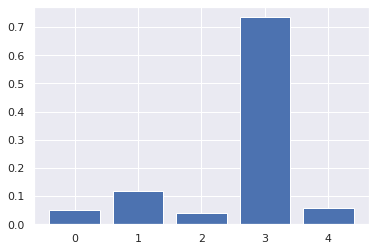

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error', 'worst radius', 'worst perimeter', 'worst smoothness', 'worst compactness', 'radius error', 'worst fractal dimension', 'fractal dimension error', 'mean symmetry', 'worst texture', 'worst concavity']
Best k: 3 
Best Cross Validate: 0.9573101265822783 



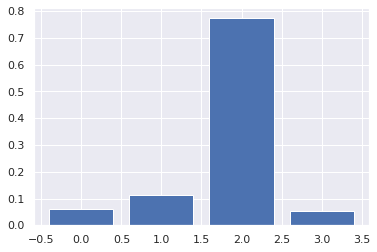

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error', 'worst radius', 'worst perimeter', 'worst smoothness', 'worst compactness', 'radius error', 'worst fractal dimension', 'fractal dimension error', 'mean symmetry', 'worst texture', 'worst concavity', 'worst symmetry']
Best k: 5 
Best Cross Validate: 0.9572784810126581 



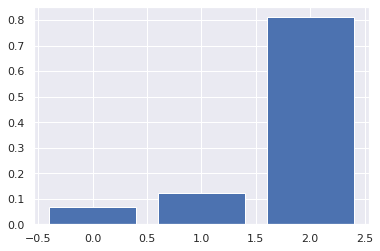

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error', 'worst radius', 'worst perimeter', 'worst smoothness', 'worst compactness', 'radius error', 'worst fractal dimension', 'fractal dimension error', 'mean symmetry', 'worst texture', 'worst concavity', 'worst symmetry', 'area error']
Best k: 6 
Best Cross Validate: 0.9496518987341773 



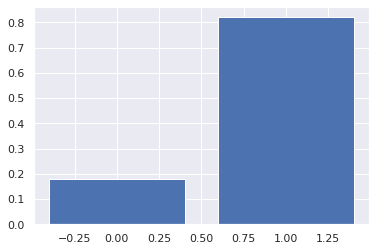

----------------------------------------
Removed Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'perimeter error', 'mean fractal dimension', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'smoothness error', 'worst radius', 'worst perimeter', 'worst smoothness', 'worst compactness', 'radius error', 'worst fractal dimension', 'fractal dimension error', 'mean symmetry', 'worst texture', 'worst concavity', 'worst symmetry', 'area error', 'worst area']
Best k: 34 
Best Cross Validate: 0.9246202531645569 



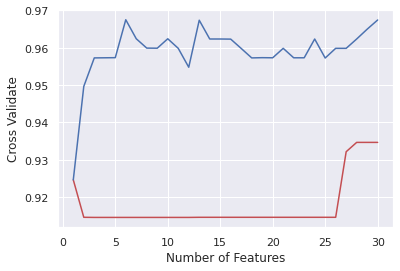

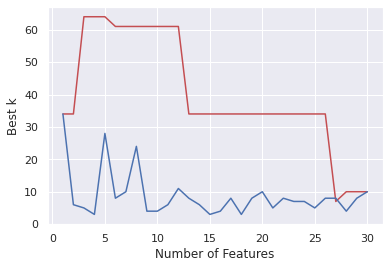

In [ ]:
### YOUR CODE HERE ###

def Feature_selector (X_train , y_train , tr=0.95):
  from sklearn import tree
  from sklearn import feature_selection
  from matplotlib import pyplot

  X_train_fs = X_train
  flag = 1
  best_k_list = []
  best_cross_validate_list = []
  least_importance_index = []
  feature_name = np.array(dataset.feature_names) # record feature name of the dataset

  full_k, full_cross_validate = KNN_find_best_k(X_train, y_train)
  print('Full k:',full_k, '\nFull Feature Cross Validate:',full_cross_validate)

  best_k_list.append(full_k)
  best_cross_validate_list.append(full_cross_validate)

  dt = tree.DecisionTreeClassifier()

  while(flag):

    dt.fit(X_train_fs,y_train)
    importance = dt.feature_importances_  # output importance of different features
    current_feature_length = len(importance)

    importance_df = pd.DataFrame(data=[importance], columns=feature_name)
    importance_np = np.array(importance)  # transform importance to numpy

    pyplot.bar([x for x in range(current_feature_length)], importance)
    pyplot.show()
    print('----------------------------------------')

    removed_importance_index = np.argmin(importance_np)

    least_importance_index.append(feature_name[removed_importance_index]) # record the least important feature that just found
    X_train_fs.drop(feature_name[removed_importance_index], axis=1, inplace=True) # remove the least important feature from dataset
    feature_name = np.delete(feature_name, removed_importance_index)  # Temove the least important feature name from feature name index

    print('Removed Features:',least_importance_index) # plot the feature name that just removed
    
    best_k, best_cross_validate = KNN_find_best_k(X_train_fs, y_train)  # find best k
    best_k_list.append(best_k)
    best_cross_validate_list.append(best_cross_validate)
    print('Best k:',best_k, '\nBest Cross Validate:',best_cross_validate,'\n')
  
    if((best_cross_validate < tr*full_cross_validate) | (current_feature_length <=2)):
      flag = 0  # keep removing features unless fulfilling the requirement

  return best_k_list, best_cross_validate_list, least_importance_index



def KNN_find_best_k (X_train, y_train):
  best_k = 1
  best_cross_validate = 0

  for k in range (1,101):

    knn = neighbors.KNeighborsClassifier(n_neighbors = k )
    scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
    current_cross_validate = scores['test_score'].mean()

    if current_cross_validate > best_cross_validate:
      best_cross_validate = current_cross_validate
      best_k = k
  
  return best_k, best_cross_validate


### Main Program Here ###

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler
X_train_scale = pd.DataFrame(data=(scaler.transform(X_train)), columns=dataset.feature_names)

print('Loading...') 

best_k_list_scale, best_cross_validate_list_scale, least_importance_index_scale = Feature_selector (X_train_scale, y_train, tr=0.95)

axis = range(1,31)
best_k_list_scale = best_k_list_scale[::-1]  # reverse the array
best_cross_validate_list_scale = best_cross_validate_list_scale[::-1]

plt.plot(axis, best_cross_validate_list, 'r', label='BestCrossValidate')
plt.plot(axis, best_cross_validate_list_scale, 'b', label='BestCrossValidate')
plt.xlabel('Number of Features')
plt.ylabel('Cross Validate')
plt.show()


plt.plot(axis, best_k_list, 'r', label='BestK')
plt.plot(axis, best_k_list_scale, 'b', label='BestK')
plt.xlabel('Number of Features')
plt.ylabel('Best k')
plt.show()

### This program might take up to 5 mins to run ###
### Thanks for your patience ###

## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

**Answer:**

**We could observe from the graphs plotted in Part 4 that there is a pole of highest accuracy (96.7%) with k of around 6. We use the same parameter to creat the model applying to the test dataset, and achieve an accuracy of about 93.5%. There could be certain overfitting problem in this KNN model since the accuracy of train set is a little bit higher than than of test set, but stil within acceptable range.**

In [ ]:
### YOUR CODE HERE ###
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler
X_test_scale = pd.DataFrame(data=(scaler.transform(X_test)), columns=dataset.feature_names)

# select certain columns of dataset according to the features of most importance that found before 
X_test_scale_fs = {'worst concave points':X_test_scale['worst concave points'],'worst area':X_test_scale['worst area'],'area error':X_test_scale['area error'],'worst symmetry':X_test_scale['worst symmetry'],'worst texture':X_test_scale['worst texture'],'worst concavity':X_test_scale['worst concavity']}

X_test_scale_fs_df = pd.DataFrame(X_test_scale_fs)

knn = neighbors.KNeighborsClassifier(n_neighbors = 10 )
scores_scale_fs = cross_validate(knn, X_test_scale_fs_df, y_test, cv=5, return_train_score=True)
cross_validate_scale_fs = scores_scale_fs['test_score'].mean()

print("Selected feature: worst concave points, worst area, area error, worst symmetry, worst texture, worst concavity \nk = 10 \nCross validate:",cross_validate_scale_fs)






Selected feature: worst concave points, worst area, area error, worst symmetry, worst texture, worst concavity 
k = 10 
Cross validate: 0.9352941176470588


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/